In [1]:
import numpy as np
import math

In [2]:
''' Fully segregated CT initial density'''
L=2.0
sigma=0.15
def rho1_int(s): # initial density
    rho_a=0.0; rho_b=1.0 # cars
    return rho_a+(rho_b-rho_a)*np.exp(-0.5*(((s-L/4)/sigma)**2))
                
def rho2_int(s): # initial density
    rho_a=0.0; rho_b=0.5 # Trucks
    return rho_a+(rho_b-rho_a)*np.exp(-0.5*(((s-3*L/4)/sigma)**2))

Nx=100
X_CT= np.linspace(0,L,Nx) # creating the space grid    
ro1_CT = np.zeros(Nx)
ro2_CT = np.zeros(Nx)
for i in range(len(X_CT)):
    ro1_CT[i] = rho1_int(X_CT[i])
    ro2_CT[i] = rho2_int(X_CT[i])

In [3]:
''' Fully segregated TC initial density'''
sigma=0.15
L=2.0
def rho1_int(s): # initial density
    rho_a=0.0; rho_b=1.0 # cars
    return rho_a+(rho_b-rho_a)*np.exp(-0.5*(((s-3*L/4)/sigma)**2))
                
def rho2_int(s): # initial density
    rho_a=0.0; rho_b=0.5 # Trucks
    return rho_a+(rho_b-rho_a)*np.exp(-0.5*(((s-L/4)/sigma)**2))

Nx=100
X_TC= np.linspace(0,L,Nx) # creating the space grid    
ro1_TC = np.zeros(Nx)
ro2_TC = np.zeros(Nx)
for i in range(len(X_TC)):
    ro1_TC[i] = rho1_int(X_TC[i])
    ro2_TC[i] = rho2_int(X_TC[i])

In [4]:
L=6
''' Integrated initial TCT density'''
sigma=0.15
def rho1_int(s): # initial density
    rho_a=0.0; rho_b=1.0 # cars
    return rho_a+(rho_b-rho_a)*(np.exp(-0.5*(((s-3*L/12)/sigma)**2))+np.exp(-0.5*(((s-7*L/12)/sigma)**2))+np.exp(-0.5*(((s-11*L/12)/sigma)**2)))
              
def rho2_int(s): # initial density
    rho_a=0.0; rho_b=0.5 # Trucks
    return rho_a+(rho_b-rho_a)*(np.exp(-0.5*(((s-L/12)/sigma)**2))+np.exp(-0.5*(((s-5*L/12)/sigma)**2))+np.exp(-0.5*(((s-9*L/12)/sigma)**2)))

Nx=100
X_TCT= np.linspace(0,L,Nx) # creating the space grid    
ro1_TCT = np.zeros(Nx)
ro2_TCT = np.zeros(Nx)
for i in range(len(X_TCT)):
    ro1_TCT[i] = rho1_int(X_TCT[i])
    ro2_TCT[i] = rho2_int(X_TCT[i])

In [5]:
ro1=[ro1_TC,ro1_CT,ro1_TCT]
ro2=[ro2_TC,ro2_CT,ro2_TCT]
X=[X_TC,X_CT,X_TCT]

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import argparse
import pylab

def set_size(width, fraction=1, subplot=[1,1]):
    if width == 'elsevier':
        width_pt=468.0
    elif width == 'beamer':
        width_pt=307.28987
    else:
        width_pt=width
    fig_width_pt=width_pt*fraction  # Width of figure
    inches_per_pt=1/82           # Convert from pt to inches
    golden_ratio=0.25               # (5**.5 - 1)/2
    fig_width_in=fig_width_pt*inches_per_pt  # Figure width in inches
    fig_hight_in=fig_width_in*golden_ratio*(subplot[0]/subplot[1])
    fig_dim=(fig_width_in,fig_hight_in)
#     print(fig_dim)
    return fig_dim

plt.style.use('seaborn-colorblind') # Using seaborn's style
nice_fonts={
    "text.usetex" : True,
    "font.family" : "serif",
    "axes.labelsize" : 5,
    "font.size" : 10,
    "legend.fontsize" : 8,
    "xtick.labelsize" : 8,
    "ytick.labelsize" :8,
}
mpl.rcParams.update(nice_fonts)

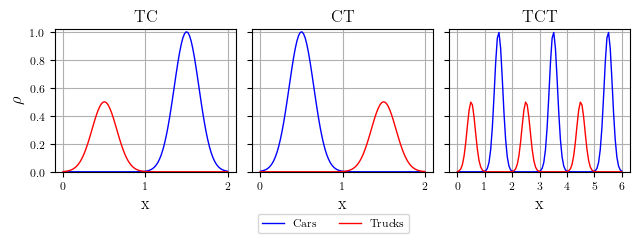

<Figure size 640x480 with 0 Axes>

In [10]:
ln=1; col=3
fig, axs = plt.subplots(ln, col, figsize=set_size('elsevier',fraction=1.3))
labels = ["Cars","Trucks"]
for j in range(col):
    axs[j].plot(X[j],ro1[j],color='blue',label='Cars',linewidth=1.0,linestyle='solid')  # linestyle='solid','dotted'
    axs[j].plot(X[j],ro2[j],color='red',label='Trucks',linewidth=1.0,linestyle='solid')
    axs[j].set_ylim(ymin=0.0, ymax=1.02)
    #axs[i, j].set_xlim(xmin=0.0, xmax=2.0)
    axs[j].grid()
    #    axs[i, j].tick_params(axis='x', rotation=45)
    if j!=0: 
        axs[j].set_yticklabels([])#set_xticks([])
    if j!=col-1: axs[j].set_xticks([0,1,2])
    else: axs[j].set_xticks([0,1,2,3,4,5,6])
    plt.subplots_adjust(wspace=0.09, hspace=0.5)
            
axs[0].set_xlabel("x", fontsize= 12)
axs[0].set_ylabel(r"$\rho$", fontsize = 12)
axs[0].set_title("TC", fontsize= 12)
axs[1].set_xlabel("x", fontsize = 12)
axs[1].set_title("CT", fontsize= 12)
axs[2].set_xlabel("x", fontsize = 12)
axs[2].set_title("TCT", fontsize= 12)
#plt.xticks(rotation = 45)
#fig.legend(labels=labels, loc="lower center", ncol=3)
fig.legend(labels=labels, loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=4,) #center right
plt.show()
#fig.savefig("./fig_2class_initial_config.pdf", dpi=300, bbox_inches='tight')
#fig.savefig("./fig_2class_initial_config.png", dpi=300, bbox_inches='tight')
plt.clf()